In [ ]:
"""
Plots membership functions for fuzzification. The `post` function takes care of plot appearence and saving.
Legends are exported seperately 
"""
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pathlib as pl
import os
import math
import copy
import pylab
import pylab
import matplotlib.font_manager
import matplotlib
import matplotlib.ticker as ticker
from matplotlib import rcParams
from skfuzzy import control as ctrl
rcParams["mathtext.default"]='rm'
rcParams['mathtext.fontset'] = 'stixsans'
# del matplotlib.font_manager.weight_dict['roman']
cwd = os.getcwd()
output_dir = os.path.join(cwd,"graphs")
line_width  = 2
axis_font = {'fontname':'Times New Roman', 'size':'18'}
title_font = {'fontname':'Times New Roman', 'size':'20'}
legend_font = { 'family':'Times New Roman','size':'18'}
# colors = ['indigo','darkred','teal','royalblue','seagreen','tan']
colors = ['black','indigo' ,'grey','royalblue','olive','darkred']
line_patterns = [[8,2,8,2],[2,1,2,1],[8,1,8,1],[2,2,2,2],[4,1,4,1]]

format = ".svg"
def post(ax,name,tags_x_locs,tags):
    """
    This function takes the fig and also the name of the plot and does post processing as well as saving the fig.
    """
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname(axis_font['fontname'])
        label.set_fontsize(float(axis_font['size']))
    ax.set_title(name,**title_font,fontweight='bold')
    ax.title.set_position([.5, 1.25])
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    # ax.get_legend().remove()
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop=legend_font)
    # plt.tight_layout()
    # 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.subplots_adjust(left=0.11, right=0.95,bottom=0.25, top=0.7)
    ax.set_ylim([0,1.05])

    for i in range(len(tags)): 
        tags_x_loc = tags_x_locs[i]
        tag = tags[i]
        pos = 1.1
        if tag == 'Inhib.' and name == 'Mg$^{2+}$ ions':
            tags_x_loc = tags_x_loc-1.5
            pos = 0.45
            ax.text(tags_x_loc,pos,tag,size = 17, color = colors[i], rotation=50, fontname = 'Times New Roman',
               horizontalalignment='center',
            verticalalignment='bottom')
        else:
            ax.text(tags_x_loc,pos,tag,size = 17, color = colors[i], rotation='horizontal', fontname = 'Times New Roman',
               horizontalalignment='center',
            verticalalignment='bottom')

    plt.savefig( os.path.join(output_dir,name+format))
def plot_legends():
    fig = pylab.figure(figsize=(5.5, 3))
    ax = fig.add_subplot(111)
    fakes = {0.8:5,5:12,15:20,40:29,60:40} # fake positions maping
    range = np.arange(0, 40, .5)
    # Generate fuzzy membership functions
    neg = fuzz.trapmf(range, [0,0,0.8,5])
    low = fuzz.trimf(range, [0.8,5,15])
    medium = fuzz.trimf(range, [5,15,40])
    high = fuzz.trapmf(range, [15,40,60,60])
    # fake the values
    fake_neg = fuzz.trapmf(range, [0,0,fakes[0.8],fakes[5]])
    fake_low = fuzz.trimf(range, [fakes[0.8],fakes[5],fakes[15]])
    fake_medium = fuzz.trimf(range, [fakes[5],fakes[15],fakes[40]])
    fake_high = fuzz.trapmf(range, [fakes[15],fakes[40],fakes[60],fakes[60]])
    # Visualize these universes and membership functions
    line1, =ax.plot(range, fake_neg,colors['neg'], linewidth=line_width, label='Negligible',linestyle=linestyles['neg'])
    line2, =ax.plot(range, fake_low, colors['low'], linewidth=line_width, label='Low',linestyle=linestyles['low'])
    line2.set_dashes([1, 1, 1, 1])
    line3, =ax.plot(range, fake_medium, colors['medium'], linewidth=line_width, label='medium',linestyle=linestyles['medium'])
    line3.set_dashes([2, 1, 2, 1])
    line4, =ax.plot(range, fake_high, colors['high'], linewidth=line_width, label='High',linestyle=linestyles['high'])
    line4.set_dashes([4, 2, 4, 2])
    #ax.set_title('BMP membership')
    ax.set_xticks([0,fakes[0.8],fakes[5],fakes[15],fakes[40],fakes[60]]) 
    ax.set_xticklabels([0,0.8,r'$c_{mlt}$',r'$c_{mmt}$',r'$c_{mht}$',60])
    # ax.set_ylabel('Membership',**axis_font)
    ax.set_xlabel('Concentration (mM)',**axis_font)
    return fig,ax,'legends'

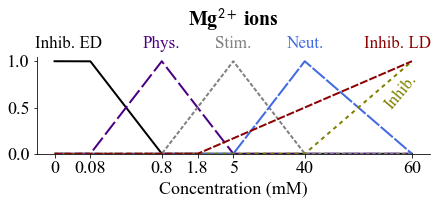

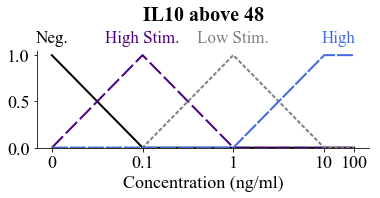

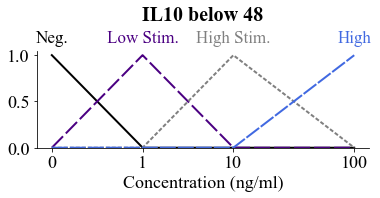

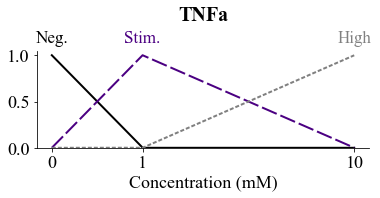

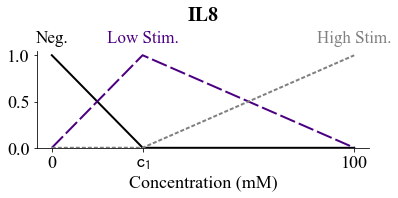

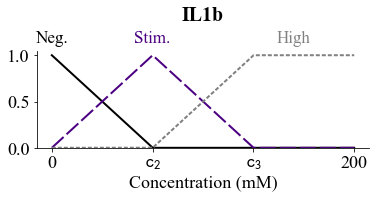

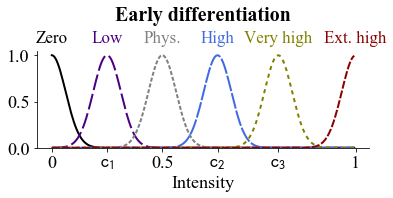

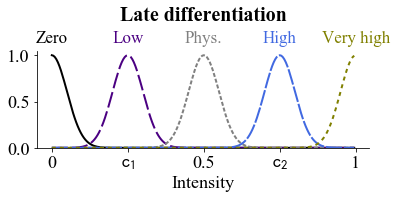

<Figure size 108x93.6 with 0 Axes>

In [2]:
def plot_IL8():
    fig,ax = plt.subplots(figsize=(5.5, 3))
    max_value = 10
    factor = ctrl.Antecedent(np.arange(0, max_value, .005), 'TNFa')
    intervals_real = [0,10,100]
    intervals = [0,3,10] #fake ones
    # Generate fuzzy membership functions
    neg = fuzz.trimf(factor.universe, [intervals[0], intervals[0],intervals[1]])
    lowStim = fuzz.trimf(factor.universe, [intervals[0], intervals[1], intervals[2]])
    highStim = fuzz.trimf(factor.universe, [intervals[1], intervals[2], intervals[2]])

    factors = [neg,lowStim,highStim]
    for i in range(len(factors)):
        if i == 0:
            linestyle = 'solid'
        else:
            linestyle = 'dashed'
        
        line, =ax.plot(factor.universe, factors[i],colors[i], linewidth=line_width,linestyle=linestyle)

        if i == 0:
            pass
        else:
            line.set_dashes(line_patterns[i-1])

    ax.set_xticks(intervals) 
    intervals_real[1] = r'$c_{1}$'
    ax.set_xticklabels(intervals_real)
    ax.set_xlabel('Concentration (mM)',**axis_font)
    tags_x_locs = [intervals[0],intervals[1],intervals[2]]
    tags = ['Neg.','Low Stim.','High Stim.']
    return fig,ax,'IL8',tags_x_locs,tags

def plot_IL1b():
    fig,ax = plt.subplots(figsize=(5.5, 3))
    max_value = 15
    factor = ctrl.Antecedent(np.arange(0, max_value, .005), 'TNFa')
    intervals_real = [0,10,50,200]
    intervals = [0,5,10,15] #fake ones
    # Generate fuzzy membership functions
    neg = fuzz.trimf(factor.universe, [intervals[0], intervals[0],intervals[1]])
    stim = fuzz.trimf(factor.universe, [intervals[0], intervals[1], intervals[2]])
    high = fuzz.trapmf(factor.universe, [intervals[1], intervals[2], intervals[3],intervals[3]])

    factors = [neg,stim,high]
    for i in range(len(factors)):
        if i == 0:
            linestyle = 'solid'
        else:
            linestyle = 'dashed'
        
        line, =ax.plot(factor.universe, factors[i],colors[i], linewidth=line_width,linestyle=linestyle)

        if i == 0:
            pass
        else:
            line.set_dashes(line_patterns[i-1])

    ax.set_xticks(intervals) 
    intervals_real[1] = r'$c_{2}$'
    intervals_real[2] = r'$c_{3}$'
    ax.set_xticklabels(intervals_real)
    ax.set_xlabel('Concentration (mM)',**axis_font)
    tags_x_locs = [intervals[0],intervals[1],intervals[2]+2]
    tags = ['Neg.','Stim.','High']
    return fig,ax,'IL1b',tags_x_locs,tags

def plot_MG():
    fig = pylab.figure(figsize=(6.5, 3))
    ax = fig.add_subplot(111)
    max_value = 50
    factor = ctrl.Antecedent(np.arange(0, max_value, .005), 'Mg')
    intervals_real = [0,0.08,0.8,1.8,5,40,60]
    intervals = [0,5,15,20,25,35,50] #fake ones
    # Generate fuzzy membership functions
    Des_e = fuzz.trapmf(factor.universe, [intervals[0], intervals[0],intervals[1],intervals[2]])
    Phy = fuzz.trimf(factor.universe, [intervals[1],intervals[2],intervals[4]])
    Stim = fuzz.trimf(factor.universe, [intervals[2],intervals[4],intervals[5]])
    Neut = fuzz.trimf(factor.universe, [intervals[4],intervals[5],intervals[6]])
    Tox = fuzz.trapmf(factor.universe, [intervals[5],intervals[6],intervals[-1],intervals[-1]])
    Des_l = fuzz.trapmf(factor.universe, [intervals[3],intervals[6],intervals[-1],intervals[-1]])

    factors = [Des_e,Phy,Stim,Neut,Tox,Des_l]
    # Visualize these universes and membership functions
    for i in range(len(factors)):
        if i == 0:
            linestyle = 'solid'
        else:
            linestyle = 'dashed'
        
        line, =ax.plot(factor.universe, factors[i],colors[i], linewidth=line_width,linestyle=linestyle)

        if i == 0:
            pass
        else:
            line.set_dashes(line_patterns[i-1])
    
    #ax.set_title('BMP membership')
    ax.set_xticks(intervals) 
    ax.set_xticklabels(intervals_real)
    # ax.set_ylabel('Membership',**axis_font)
    ax.set_xlabel('Concentration (mM)',**axis_font)
    tags_x_locs = [intervals[0]+2,intervals[2],intervals[4],intervals[5],intervals[6],48]
    tags = ['Inhib. ED','Phys.','Stim.','Neut.','Inhib.','Inhib. LD']
    return fig,ax,'Mg$^{2+}$ ions',tags_x_locs,tags

def plot_TNFa():
    fig,ax = plt.subplots(figsize=(5.5, 3))
    max_value = 10
    factor = ctrl.Antecedent(np.arange(0, max_value, .005), 'TNFa')
    intervals_real = [0,1,10]
    intervals = [0,3,10] #fake ones
    # Generate fuzzy membership functions
    neg = fuzz.trimf(factor.universe, [intervals[0], intervals[0],intervals[1]])
    stim = fuzz.trimf(factor.universe, [intervals[0], intervals[1], intervals[2]])
    high = fuzz.trimf(factor.universe, [intervals[1], intervals[2], intervals[2]])

    factors = [neg,stim,high]
    for i in range(len(factors)):
        if i == 0:
            linestyle = 'solid'
        else:
            linestyle = 'dashed'
        
        line, =ax.plot(factor.universe, factors[i],colors[i], linewidth=line_width,linestyle=linestyle)

        if i == 0:
            pass
        else:
            line.set_dashes(line_patterns[i-1])

    ax.set_xticks(intervals) 
    ax.set_xticklabels(intervals_real)
    ax.set_xlabel('Concentration (mM)',**axis_font)
    tags_x_locs = [intervals[0],intervals[1],intervals[2]]
    tags = ['Neg.','Stim.','High']
    return fig,ax,'TNFa',tags_x_locs,tags

def plot_earlyDiff():
    fig,ax = plt.subplots(figsize=(5.5, 3))
    max_value = 1.1
    factor = ctrl.Antecedent(np.arange(0, max_value, .005), 'earlyDiff')
    sigma = .05
    intervals_real = [0,.25,.5,.667,0.833, 1]
    intervals = [0,.2,.4,.6,0.82, 1.1] #fake ones
    # Generate fuzzy membership functions
    Z=fuzz.gaussmf(factor.universe, intervals[0], sigma)
    L=fuzz.gaussmf(factor.universe, intervals[1], sigma)
    M=fuzz.gaussmf(factor.universe, intervals[2], sigma)
    H=fuzz.gaussmf(factor.universe, intervals[3], sigma)
    VH=fuzz.gaussmf(factor.universe, intervals[4], sigma)
    EH=fuzz.gaussmf(factor.universe, intervals[5], sigma)
    
    factors = [Z,L,M,H,VH,EH]
    for i in range(len(factors)):
        if i == 0:
            linestyle = 'solid'
        else:
            linestyle = 'dashed'
        
        line, =ax.plot(factor.universe, factors[i],colors[i], linewidth=line_width,linestyle=linestyle)

        if i == 0:
            pass
        else:
            line.set_dashes(line_patterns[i-1])
#     plt.rcParams['axes.titley'] = 1.0 
    ax.set_xticks(intervals) 
    intervals_real[1] = r'$c_{1}$'
    intervals_real[3] = r'$c_{2}$'
    intervals_real[4] = r'$c_{3}$'
    ax.set_xticklabels(intervals_real)
    ax.set_xlabel('Intensity',**axis_font)
    tags_x_locs = [intervals[0],intervals[1],intervals[2],intervals[3],intervals[4],intervals[5]]
    tags = ['Zero','Low','Phys.','High','Very high','Ext. high']
    return fig,ax,'Early differentiation',tags_x_locs,tags

def plot_lateDiff():
    fig,ax = plt.subplots(figsize=(5.5, 3))
    max_value = 1
    factor = ctrl.Antecedent(np.arange(0, max_value, .005), 'lateDiff')
    sigma = .05
    intervals_real = [0,.25,.5,.75, 1]
    intervals = [0,.25,.5,.75, 1] #fake ones
    # Generate fuzzy membership functions
    Z=fuzz.gaussmf(factor.universe, intervals[0], sigma)
    L=fuzz.gaussmf(factor.universe, intervals[1], sigma)
    M=fuzz.gaussmf(factor.universe, intervals[2], sigma)
    H=fuzz.gaussmf(factor.universe, intervals[3], sigma)
    VH=fuzz.gaussmf(factor.universe, intervals[4], sigma)
    
    factors = [Z,L,M,H,VH]
    for i in range(len(factors)):
        if i == 0:
            linestyle = 'solid'
        else:
            linestyle = 'dashed'
        
        line, =ax.plot(factor.universe, factors[i],colors[i], linewidth=line_width,linestyle=linestyle)

        if i == 0:
            pass
        else:
            line.set_dashes(line_patterns[i-1])
#     plt.rcParams['axes.titley'] = 1.0 
    ax.set_xticks(intervals) 
    intervals_real[1] = r'$c_{1}$'
    intervals_real[3] = r'$c_{2}$'
    ax.set_xticklabels(intervals_real)
    ax.set_xlabel('Intensity',**axis_font)
    tags_x_locs = [intervals[0],intervals[1],intervals[2],intervals[3],intervals[4]]
    tags = ['Zero','Low','Phys.','High','Very high']
    return fig,ax,'Late differentiation',tags_x_locs,tags


fig,ax,name,tags_x_locs,tags = plot_MG()
post( ax,name,tags_x_locs,tags)

fig,ax,name,tags_x_locs,tags = plot_TNFa()
post( ax,name,tags_x_locs,tags)

fig,ax,name,tags_x_locs,tags = plot_IL8()
post( ax,name,tags_x_locs,tags)

fig,ax,name,tags_x_locs,tags = plot_IL1b()
post( ax,name,tags_x_locs,tags)

fig,ax,name,tags_x_locs,tags = plot_earlyDiff()
post( ax,name,tags_x_locs,tags)

fig,ax,name,tags_x_locs,tags = plot_lateDiff()
post( ax,name,tags_x_locs,tags)
# 
# fig,ax,name,tags_x_locs,tags= plot_MG()
# post( ax,name,tags_x_locs,tags)
# fig,ax,name = plot_legends()
# post( ax,name)

def export_legend(axes):
    figLegend = pylab.figure(figsize = (1.5,1.3))
    pylab.figlegend(*axes.get_legend_handles_labels(), loc = 'upper left')
    figLegend.savefig(os.path.join(output_dir,'legend.svg'))
export_legend(ax)

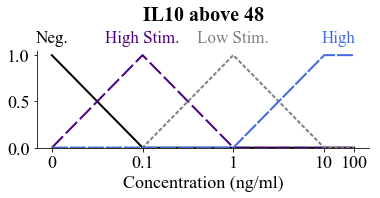

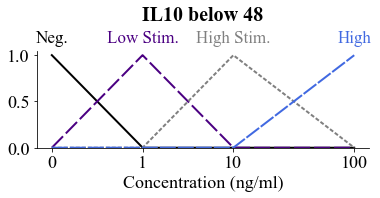

In [3]:

def plot_IL10_above48():
    fig,ax = plt.subplots(figsize=(5.5, 3))
    intervals_real = [0,0.1,1,10,100]
    intervals = [0,6,12,18,20] #fake ones
    factor = ctrl.Antecedent(np.arange(0, intervals[-1], .005), 'IL10')
    # Generate fuzzy membership functions
    Neg = fuzz.trimf(factor.universe, [intervals[0], intervals[0],intervals[1]])
    HighStim = fuzz.trimf(factor.universe, [intervals[0], intervals[1], intervals[2]])
    LowStim = fuzz.trimf(factor.universe, [intervals[1], intervals[2], intervals[3]])
    High = fuzz.trapmf(factor.universe, [intervals[2], intervals[3], intervals[-1], intervals[-1]])

    factors = [Neg,HighStim,LowStim,High]
    for i in range(len(factors)):
        if i == 0:
            linestyle = 'solid'
        else:
            linestyle = 'dashed'
        
        line, =ax.plot(factor.universe, factors[i],colors[i], linewidth=line_width,linestyle=linestyle)

        if i == 0:
            pass
        else:
            line.set_dashes(line_patterns[i-1])

    ax.set_xticks(intervals) 
    ax.set_xticklabels(intervals_real)
    # ax.set_ylabel('Membership',**axis_font)
    ax.set_xlabel('Concentration (ng/ml)',**axis_font)
    tags_x_locs = [intervals[0],intervals[1],intervals[2],intervals[3]+1]
    tags = ['Neg.','High Stim.','Low Stim.','High']
    return fig,ax,'IL10 above 48',tags_x_locs,tags

def plot_IL10_below48():
    fig,ax = plt.subplots(figsize=(5.5, 3))
    intervals_real = [0,1,10,100]
    intervals = [0,6,12,20] #fake ones
    factor = ctrl.Antecedent(np.arange(0, intervals[-1], .005), 'IL10')
    # Generate fuzzy membership functions
    Neg = fuzz.trimf(factor.universe, [intervals[0], intervals[0],intervals[1]])
    LowStim = fuzz.trimf(factor.universe, [intervals[0], intervals[1], intervals[2]])
    HighStim = fuzz.trimf(factor.universe, [intervals[1], intervals[2], intervals[3]])
    High = fuzz.trimf(factor.universe, [intervals[2], intervals[3], intervals[3]])

    factors = [Neg,LowStim,HighStim,High]
    for i in range(len(factors)):
        if i == 0:
            linestyle = 'solid'
        else:
            linestyle = 'dashed'
        
        line, =ax.plot(factor.universe, factors[i],colors[i], linewidth=line_width,linestyle=linestyle)

        if i == 0:
            pass
        else:
            line.set_dashes(line_patterns[i-1])

    ax.set_xticks(intervals) 
    ax.set_xticklabels(intervals_real)
    # ax.set_ylabel('Membership',**axis_font)
    ax.set_xlabel('Concentration (ng/ml)',**axis_font)
    tags_x_locs = [intervals[0],intervals[1],intervals[2],intervals[3]]
    tags = ['Neg.','Low Stim.','High Stim.','High']
    return fig,ax,'IL10 below 48',tags_x_locs,tags

fig,ax,name,tags_x_locs,tags = plot_IL10_above48()
post( ax,name,tags_x_locs,tags)

fig,ax,name,tags_x_locs,tags = plot_IL10_below48()
post( ax,name,tags_x_locs,tags)